# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
# For warnings
import warnings
warnings.filterwarnings('ignore')
# For Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [5]:
# Importing the file porter_data_1.csv
df=pd.read_csv(r'C:\Users\deepi\OneDrive\Documents\Upgrad\Delivery-Starter\Delivery_Starter\porter_data_1.csv')

In [7]:
df.head(2)

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [15]:
# Convert categorical features to category type

cat_Col = ['market_id','store_primary_category','order_protocol']
for col in cat_Col:
    df[col] = df[col].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [23]:
# Calculate time taken in minutes

df['Time_taken']=(df['actual_delivery_time']-df['created_at']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [27]:
# Extract the hour and day of week from the 'created_at' timestamp

df['order_hours'] = df['created_at'].dt.hour

# Create a categorical feature 'isWeekend'

df['order_day_of_week'] = df['created_at'].dt.weekday
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['isWeekend'] = df['isWeekend'].astype(int)

In [29]:
# Drop unnecessary columns
df.drop(columns=['created_at','actual_delivery_time'],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  Time_taken                175777 non-null  float64 
 13  order_hours               175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [33]:
# Define target variable (y) and features (X)

from sklearn.model_selection import train_test_split
# This is not the right place to create X and y. It should come after perfrming EDA and jut before model creation.
# I have created these variable in the down questions

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [35]:
# Split data into training and testing sets

df_train,df_test = train_test_split(df, test_size=0.2, random_state=42)
# I am not passing X and y to the train_test_split , becuase EDA should happen before deriving X and y.
# At the bottom we have to see correlation of target variable with other independent variable.
# X and y will make sense just before model creation

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  Time_taken                140621 non-null  float64 
 13  order_hours               140

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [39]:
# Define numerical and categorical columns for easy EDA and data manipulation

numCols = ['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','Time_taken',
           'total_busy_dashers','total_outstanding_orders','distance']
categoryCols = ['market_id','store_primary_category','order_protocol','order_hours','isWeekend','order_day_of_week']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

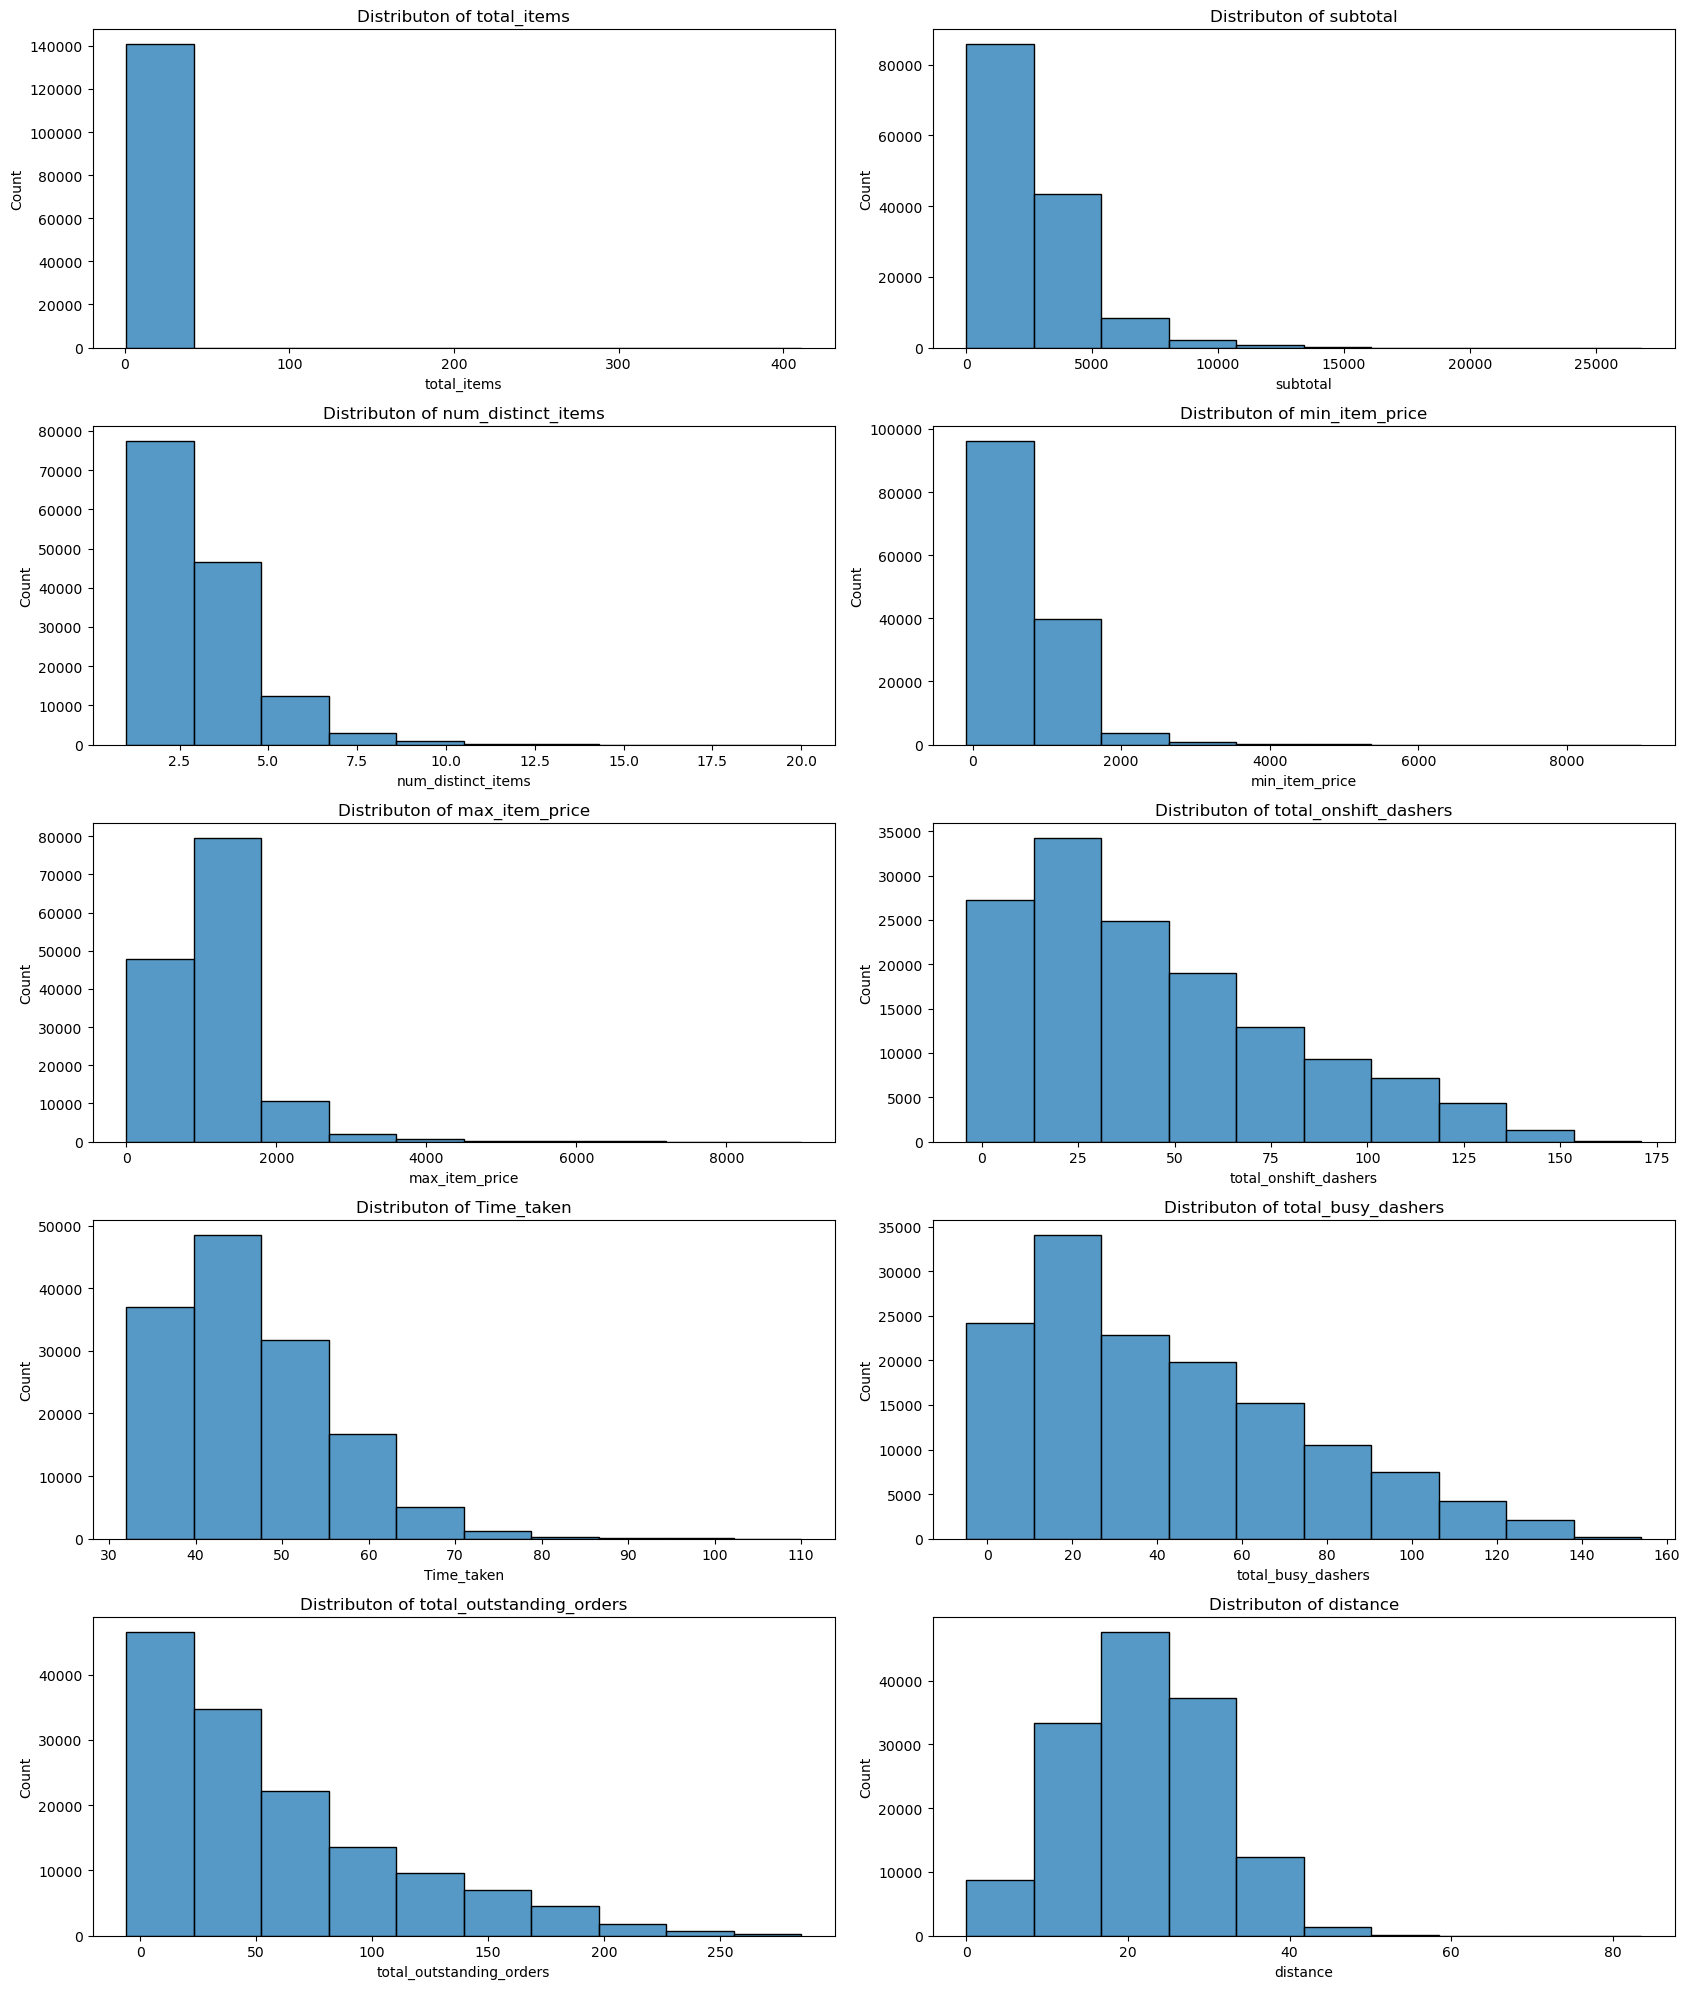

In [43]:
# Plot distributions for all numerical columns

plt.figure(figsize=(17,20))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.histplot(df_train[col],bins=10,palette='#2ca02c')
    plt.title(f'Distributon of {col}')
    plt.tight_layout()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  Time_taken                140621 non-null  float64 
 13  order_hours               140

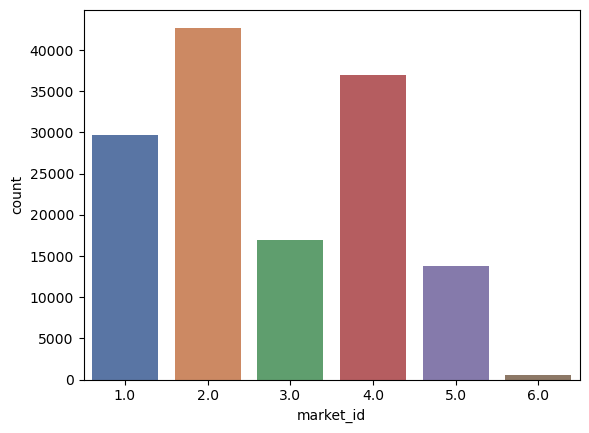

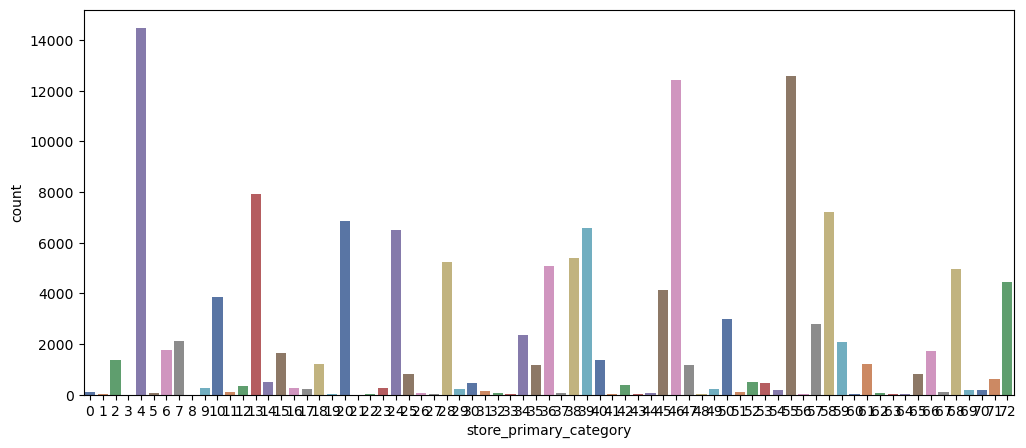

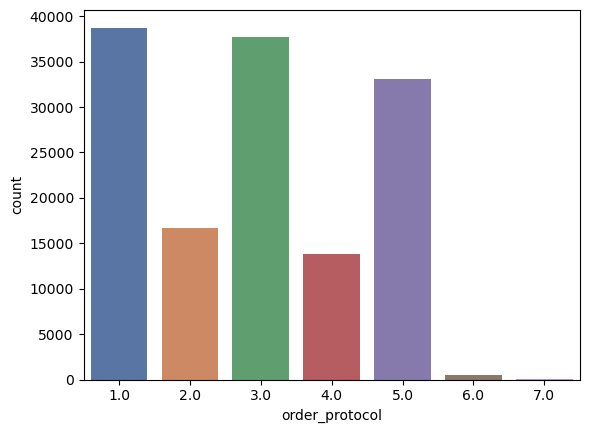

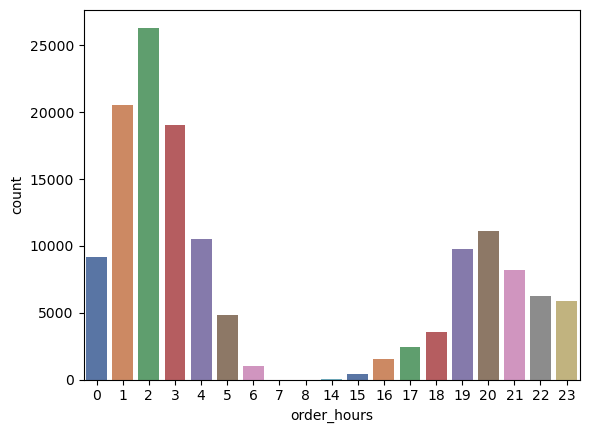

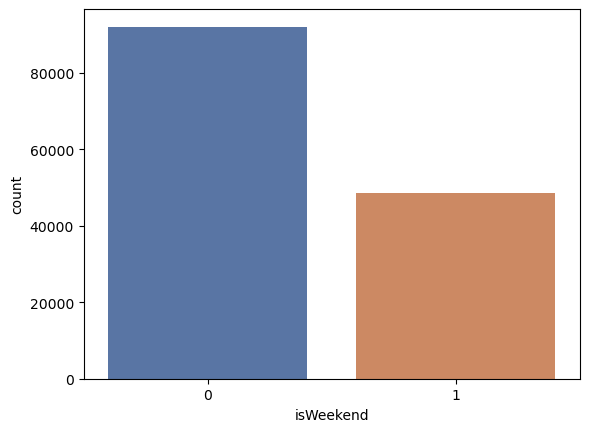

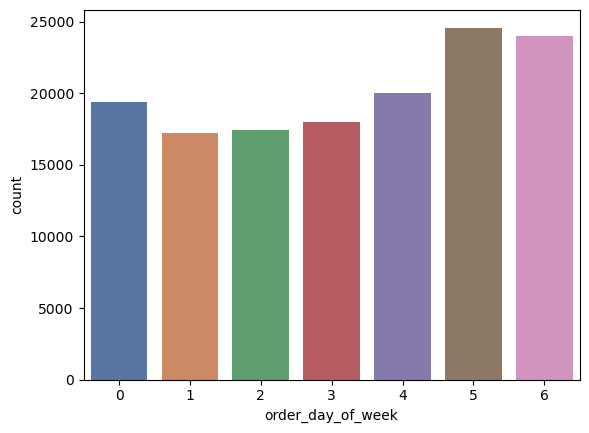

In [51]:
# Distribution of categorical columns

for col in categoryCols:
    if col == 'store_primary_category':
        plt.figure(figsize=(12,5))
    sns.countplot(x=df_train[col],palette='deep')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

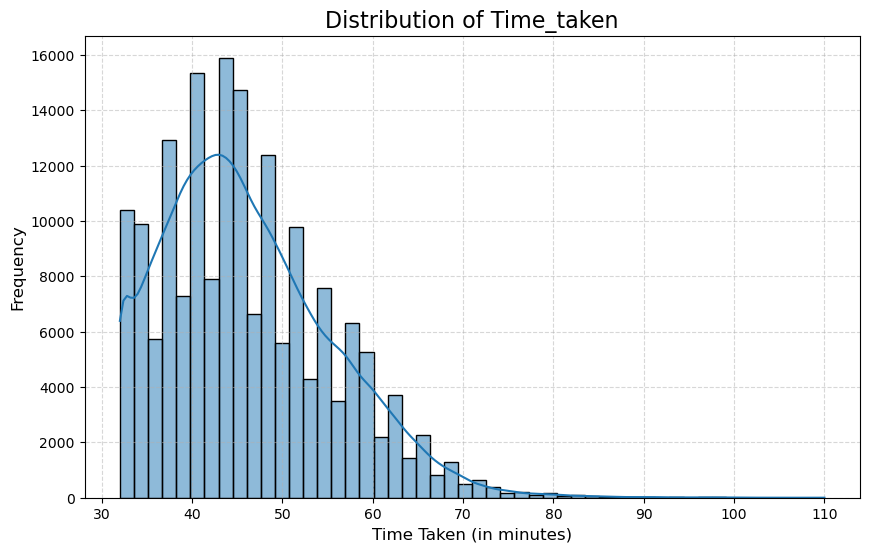

In [57]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken'], bins=50, kde=True, color='#1f77b4')
plt.title('Distribution of Time_taken', fontsize=16)
plt.xlabel('Time Taken (in minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

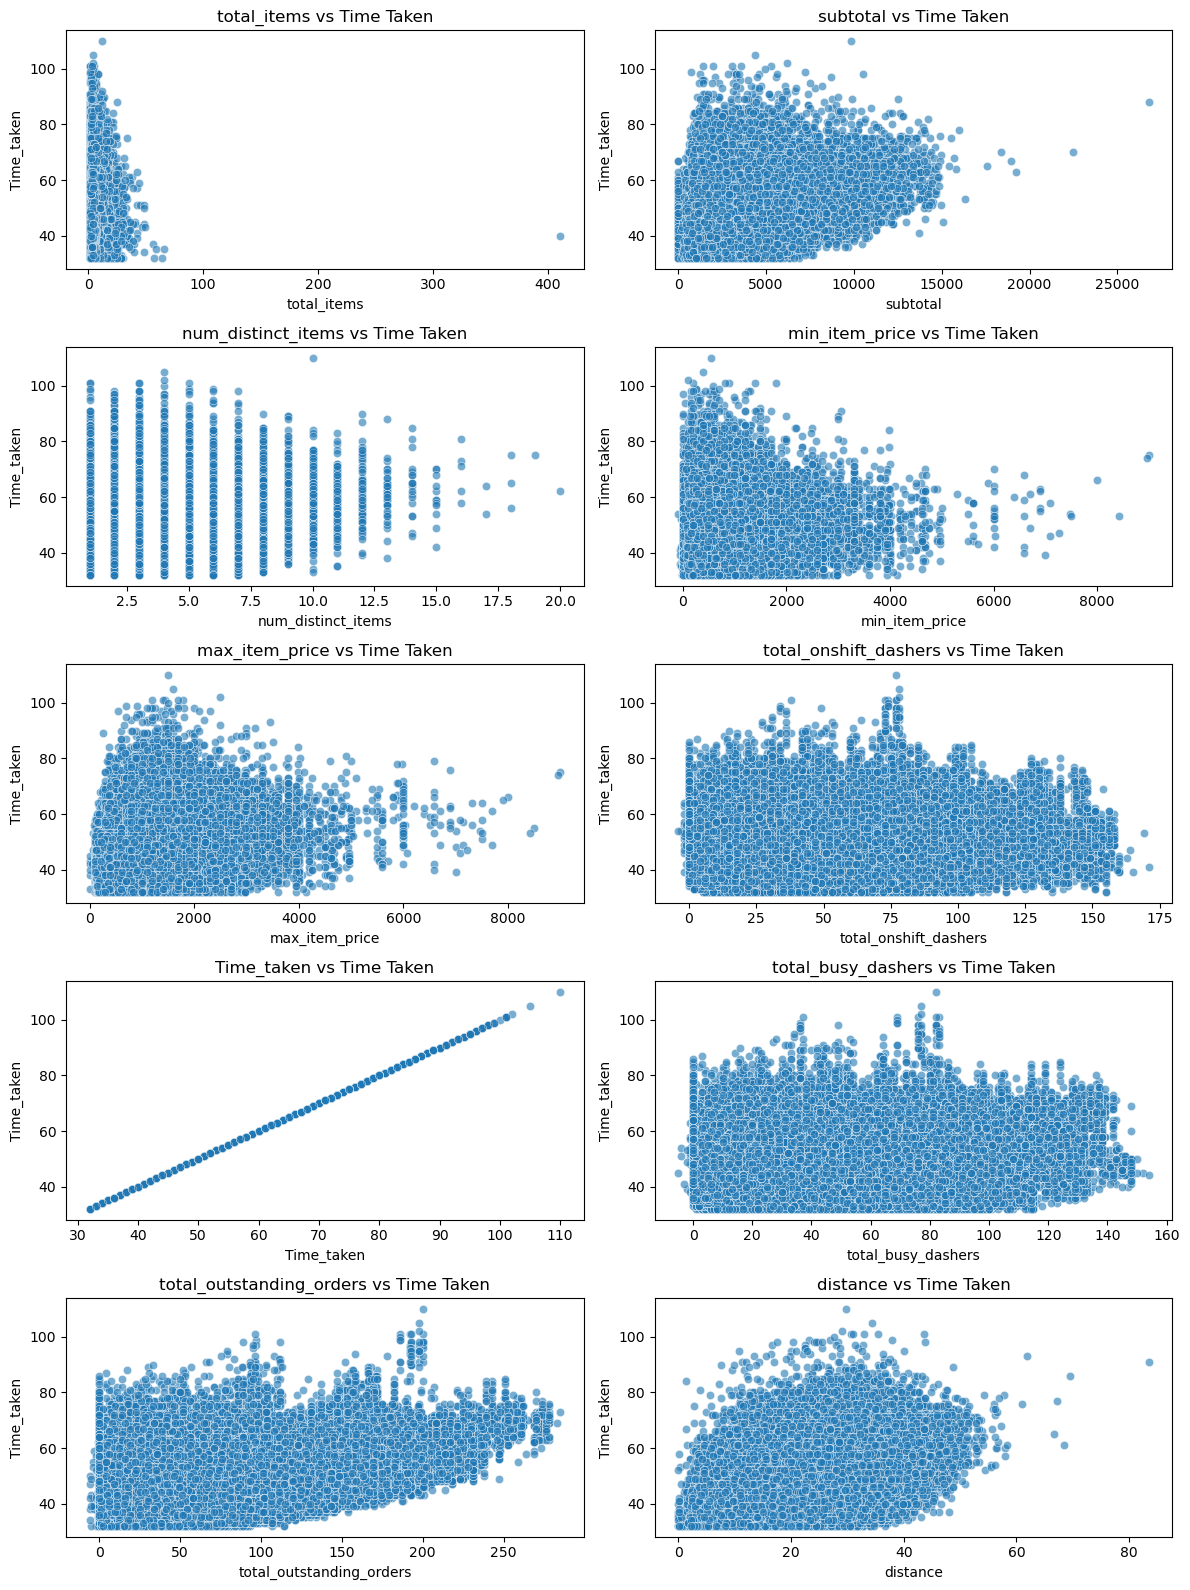

In [60]:
# Scatter plot to visualise the relationship between time_taken and other features
# For numerical columns
plt.figure(figsize=(12,16))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_train, x=col ,y='Time_taken',alpha=0.6)
    plt.title(f'{col} vs Time Taken')
    plt.tight_layout()
plt.show() 

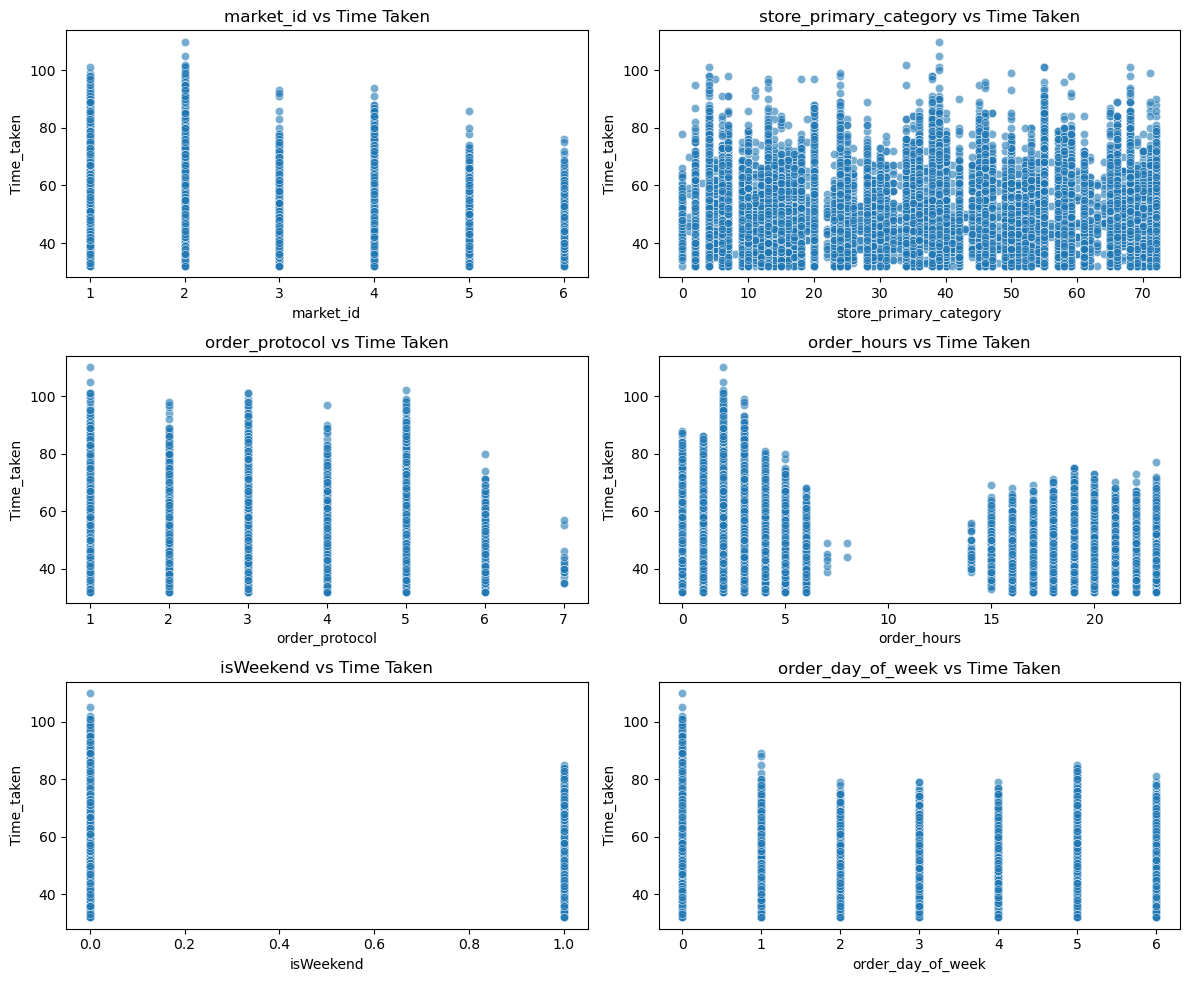

In [62]:
# For catagorical columns
plt.figure(figsize=(12,16))
for i,col in enumerate(categoryCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_train, x=col ,y='Time_taken',alpha=0.6)
    plt.title(f'{col} vs Time Taken')
    plt.tight_layout()
plt.show()

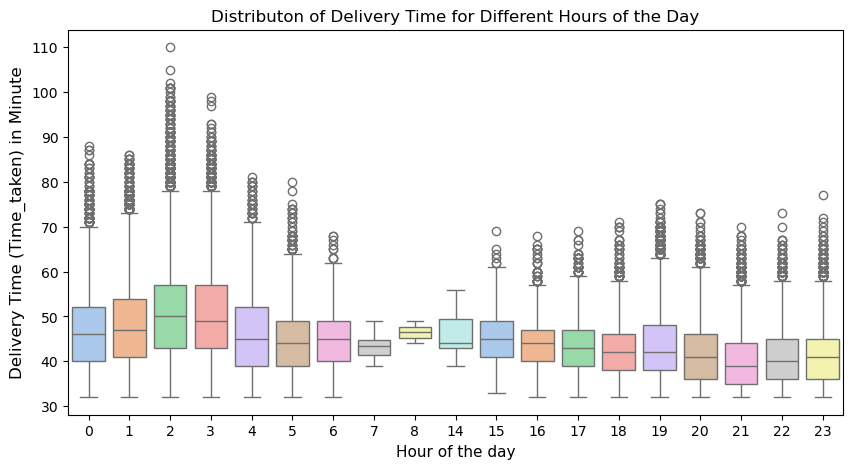

In [68]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['order_hours'],y=df_train['Time_taken'],data=df_train,palette="pastel")
plt.title('Distributon of Delivery Time for Different Hours of the Day',fontsize=12)
plt.xlabel("Hour of the day",fontsize=11)
plt.ylabel("Delivery Time (Time_taken) in Minute",fontsize=12)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

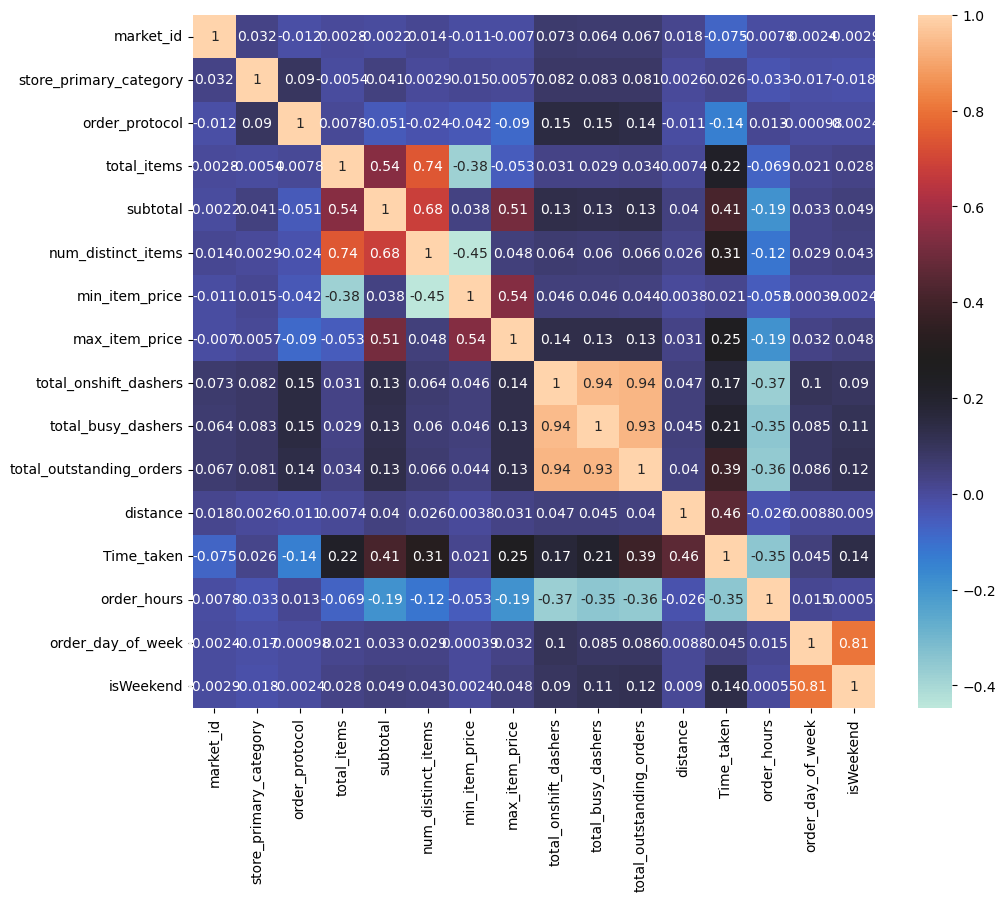

In [70]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(11,9))
sns.heatmap(df_train.corr(),annot=True,cmap='icefire')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [72]:
# Drop 3-5 weakly correlated columns from training dataset

df_train.corr()['Time_taken'].sort_values(ascending=False)

Time_taken                  1.000000
distance                    0.461026
subtotal                    0.413392
total_outstanding_orders    0.385028
num_distinct_items          0.312510
max_item_price              0.254650
total_items                 0.220804
total_busy_dashers          0.206514
total_onshift_dashers       0.171828
isWeekend                   0.137057
order_day_of_week           0.044897
store_primary_category      0.026388
min_item_price              0.021151
market_id                  -0.075067
order_protocol             -0.138070
order_hours                -0.345716
Name: Time_taken, dtype: float64

In [76]:
Weak_Corr_Col= ['order_day_of_week','store_primary_category','min_item_price','order_hours']
df_train.drop(Weak_Corr_Col,axis=1,inplace=True)

numCols=[c for c in numCols if c not in Weak_Corr_Col]
categoryCols=[c for c in categoryCols if c not in Weak_Corr_Col]

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

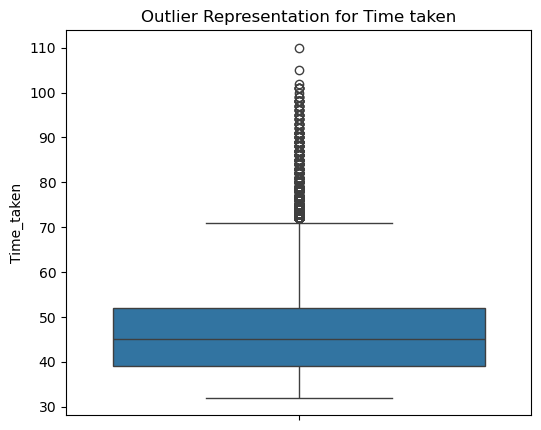

In [78]:
# Boxplot for time_taken

plt.figure(figsize=(6,5))
sns.boxplot(y=df_train['Time_taken'])
plt.title('Outlier Representation for Time taken')
plt.show()

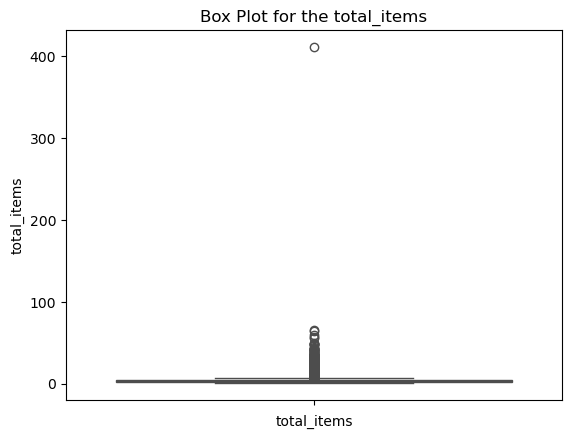

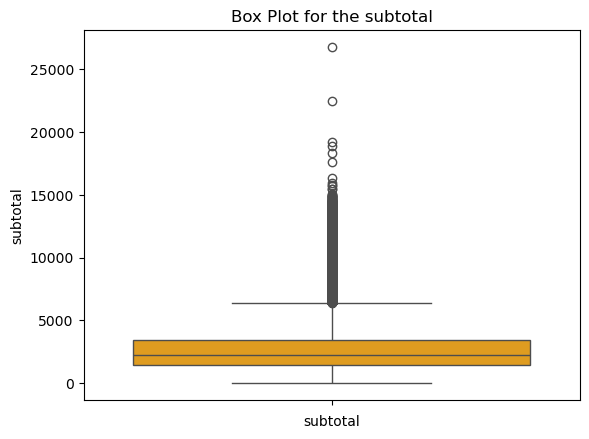

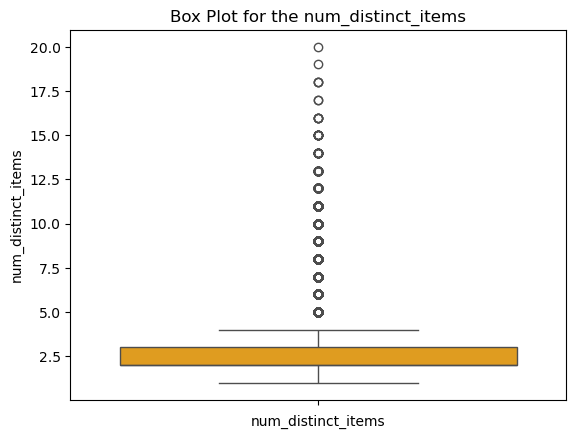

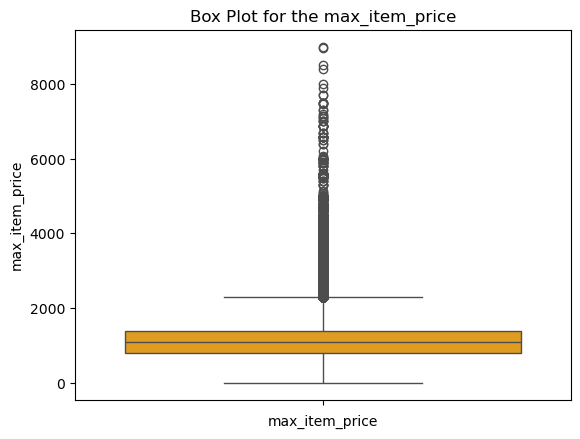

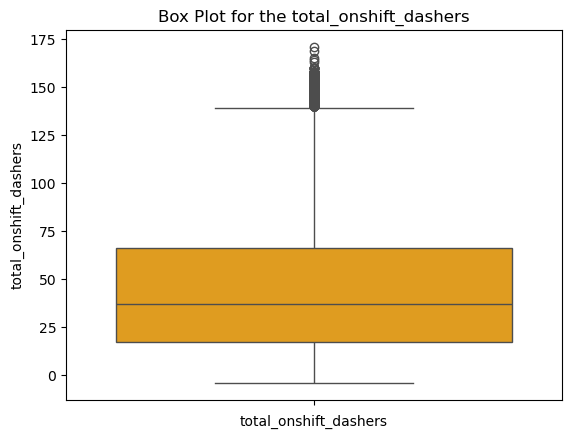

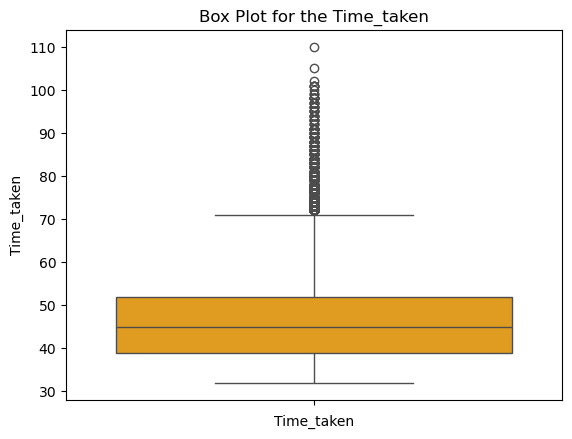

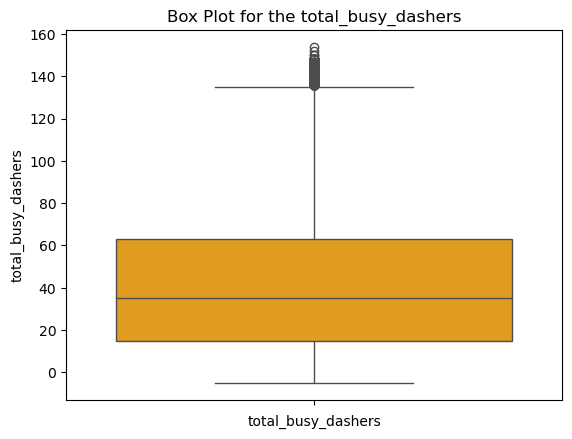

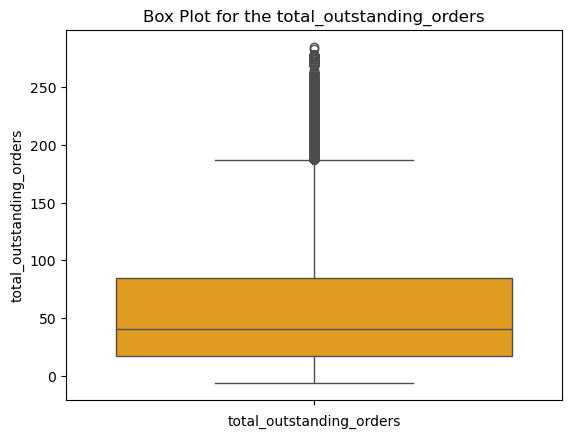

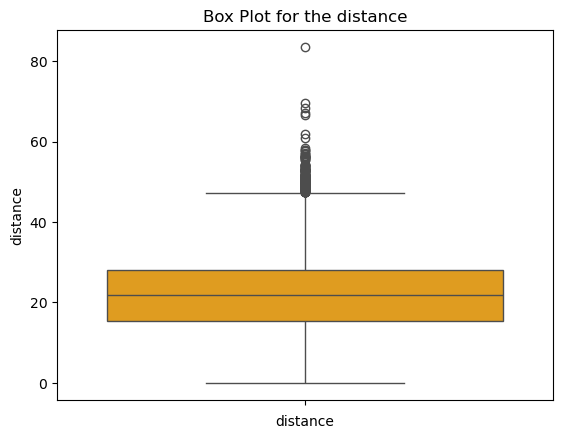

In [86]:
for col in numCols:
    sns.boxplot(data=df_train, y=df_train[col],color='Orange')
    plt.title(f"Box Plot for the {col}")
    plt.xlabel(col)
    plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [88]:
# Handle outliers

def remove_outliers(df,columns,multiplier=1.5):
    df_clean=df.copy()
    for col in columns:
        Q1=df_clean[col].quantile(0.25)
        Q3=df_clean[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-multiplier*IQR
        upper_bound=Q3+multiplier*IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

def handle_Invalid_Data(df):
    #Observation:
    #1. we have certain row with subtotal as 0 and total_items > 0 , so it looks like invalid data
    df = df[df['subtotal'] > 0]
    #2. we have certain row with max_item_price less than 0 , so it looks like invalid data
    df = df[df['max_item_price'] > 0]
    #3. we have certain row with total_onshift_dashers less than 0 , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >= 0]
    #4. we have certain row with total_busy_dashers less than 0 , so it looks like invalid data
    df = df[df['total_busy_dashers'] >= 0]
    #5. we have certain row with total_outstanding_orders less than 0 , so it looks like invalid data
    df = df[df['total_outstanding_orders'] >= 0]
    #6. we have certain row with distance less than 0 , so it looks like invalid data
    df = df[df['distance'] > 0]
    #7. we have certain row with total_onshift_dashers less than total_busy_dashers , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >=  df['total_busy_dashers']]
    return df

In [88]:
# Handle outliers

def remove_outliers(df,columns,multiplier=1.5):
    df_clean=df.copy()
    for col in columns:
        Q1=df_clean[col].quantile(0.25)
        Q3=df_clean[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-multiplier*IQR
        upper_bound=Q3+multiplier*IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

def handle_Invalid_Data(df):
    #Observation:
    #1. we have certain row with subtotal as 0 and total_items > 0 , so it looks like invalid data
    df = df[df['subtotal'] > 0]
    #2. we have certain row with max_item_price less than 0 , so it looks like invalid data
    df = df[df['max_item_price'] > 0]
    #3. we have certain row with total_onshift_dashers less than 0 , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >= 0]
    #4. we have certain row with total_busy_dashers less than 0 , so it looks like invalid data
    df = df[df['total_busy_dashers'] >= 0]
    #5. we have certain row with total_outstanding_orders less than 0 , so it looks like invalid data
    df = df[df['total_outstanding_orders'] >= 0]
    #6. we have certain row with distance less than 0 , so it looks like invalid data
    df = df[df['distance'] > 0]
    #7. we have certain row with total_onshift_dashers less than total_busy_dashers , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >=  df['total_busy_dashers']]
    return df

In [90]:
df_train=handle_Invalid_Data(df_train)


outlier_col=['distance','subtotal','total_outstanding_orders','max_item_price','total_items','total_busy_dashers','total_onshift_dashers','Time_taken']
df_train=remove_outliers(df_train,outlier_col,1.5)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [92]:
# Define numerical and categorical columns for easy EDA and data manipulation

numCols=['total_items','subtotal', 'num_distinct_items', 'max_item_price', 
         'total_onshift_dashers', 'Time_taken', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

categoryCols = ['market_id', 'order_protocol', 'isWeekend']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

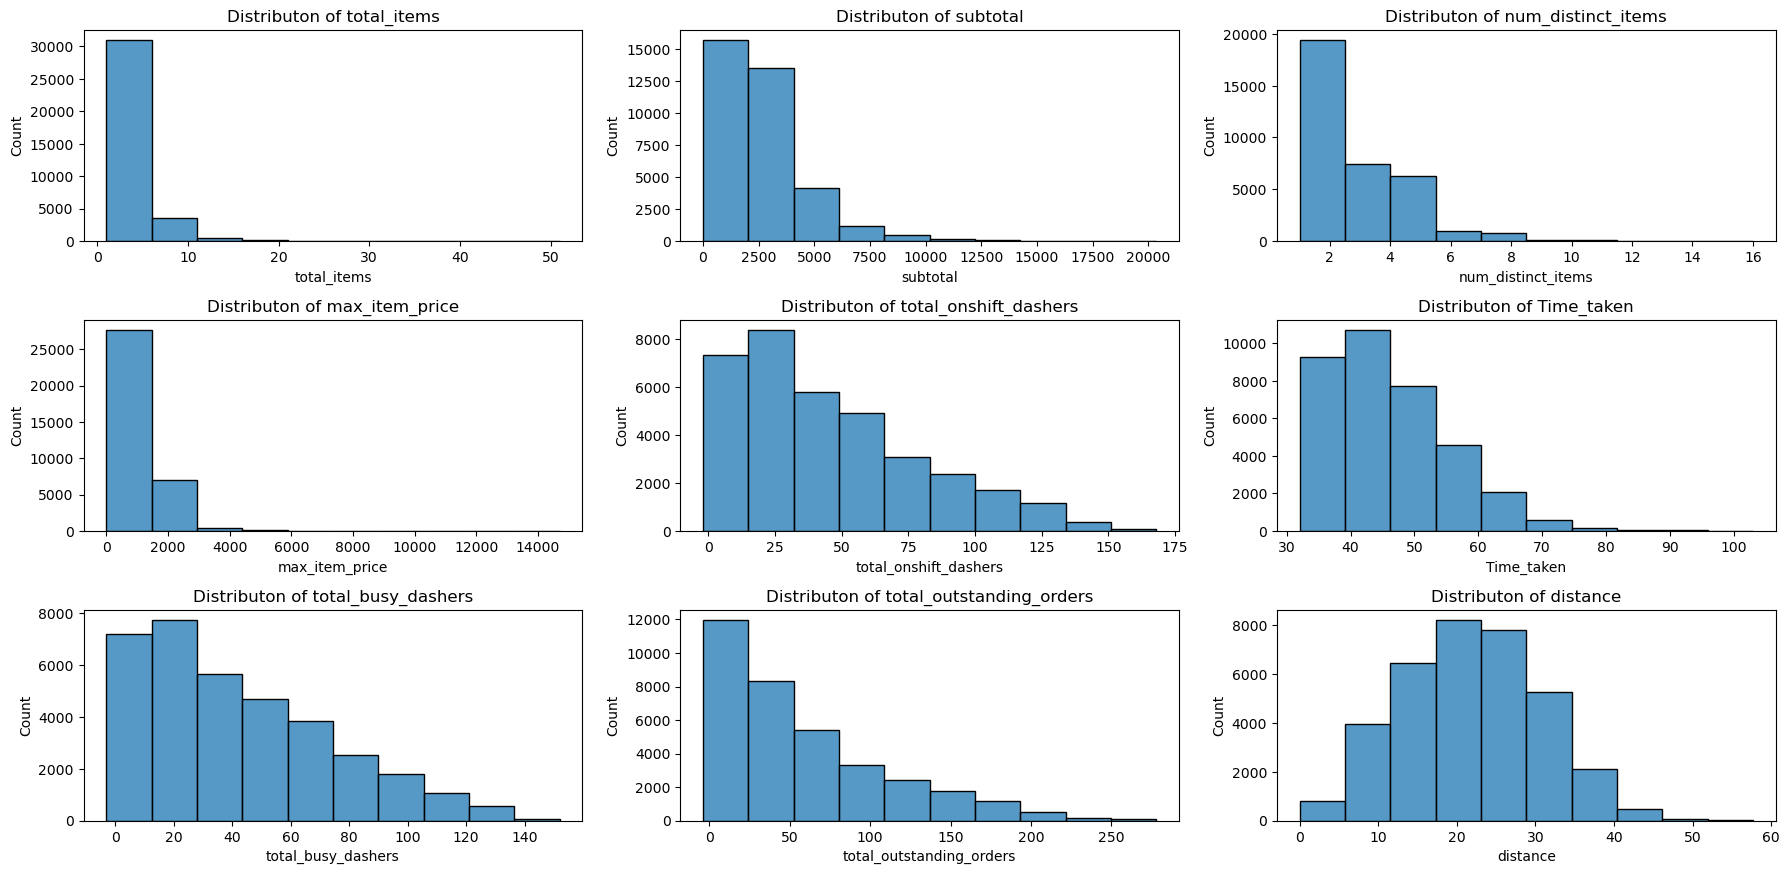

In [94]:
# Plot distributions for all numerical columns

plt.figure(figsize=(18,20))

for i,col in enumerate(numCols,1):
    plt.subplot(7,3,i)
    sns.histplot(df_test[col],bins=10,palette='#1a80bb')
    plt.title(f'Distributon of {col}')
    plt.tight_layout()

##### **4.1.2**
Check the distribution of categorical features

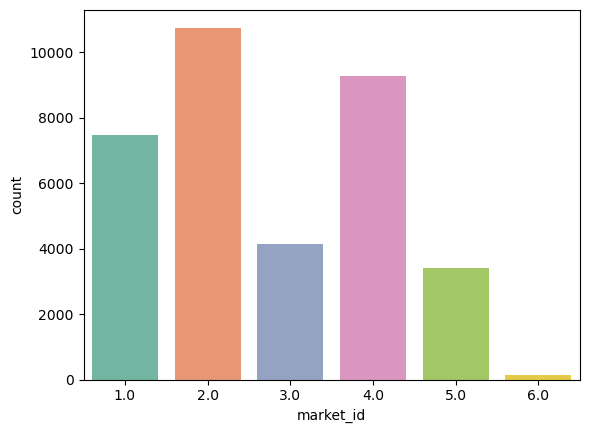

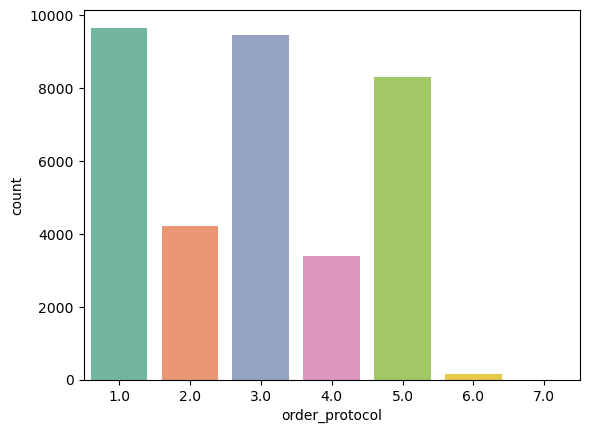

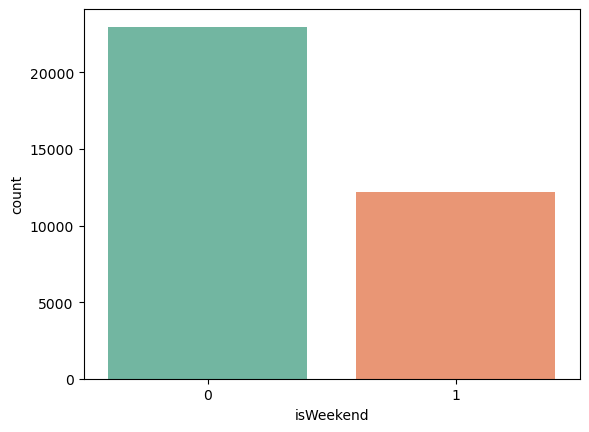

In [96]:
# Distribution of categorical columns

for col in categoryCols:
    sns.countplot(x=df_test[col],palette='Set2')
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

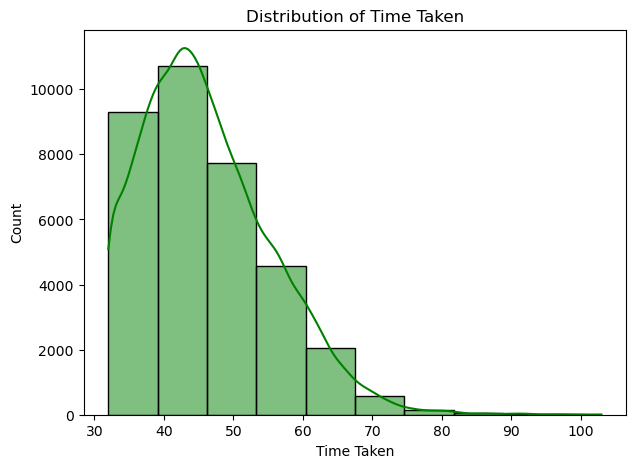

In [102]:
# Distribution of time_taken

plt.figure(figsize=(7,5))
sns.histplot(df_test['Time_taken'],kde=True, bins=10,color="green")
plt.title("Distribution of Time Taken")
plt.xlabel("Time Taken")
plt.ylabel("Count")
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

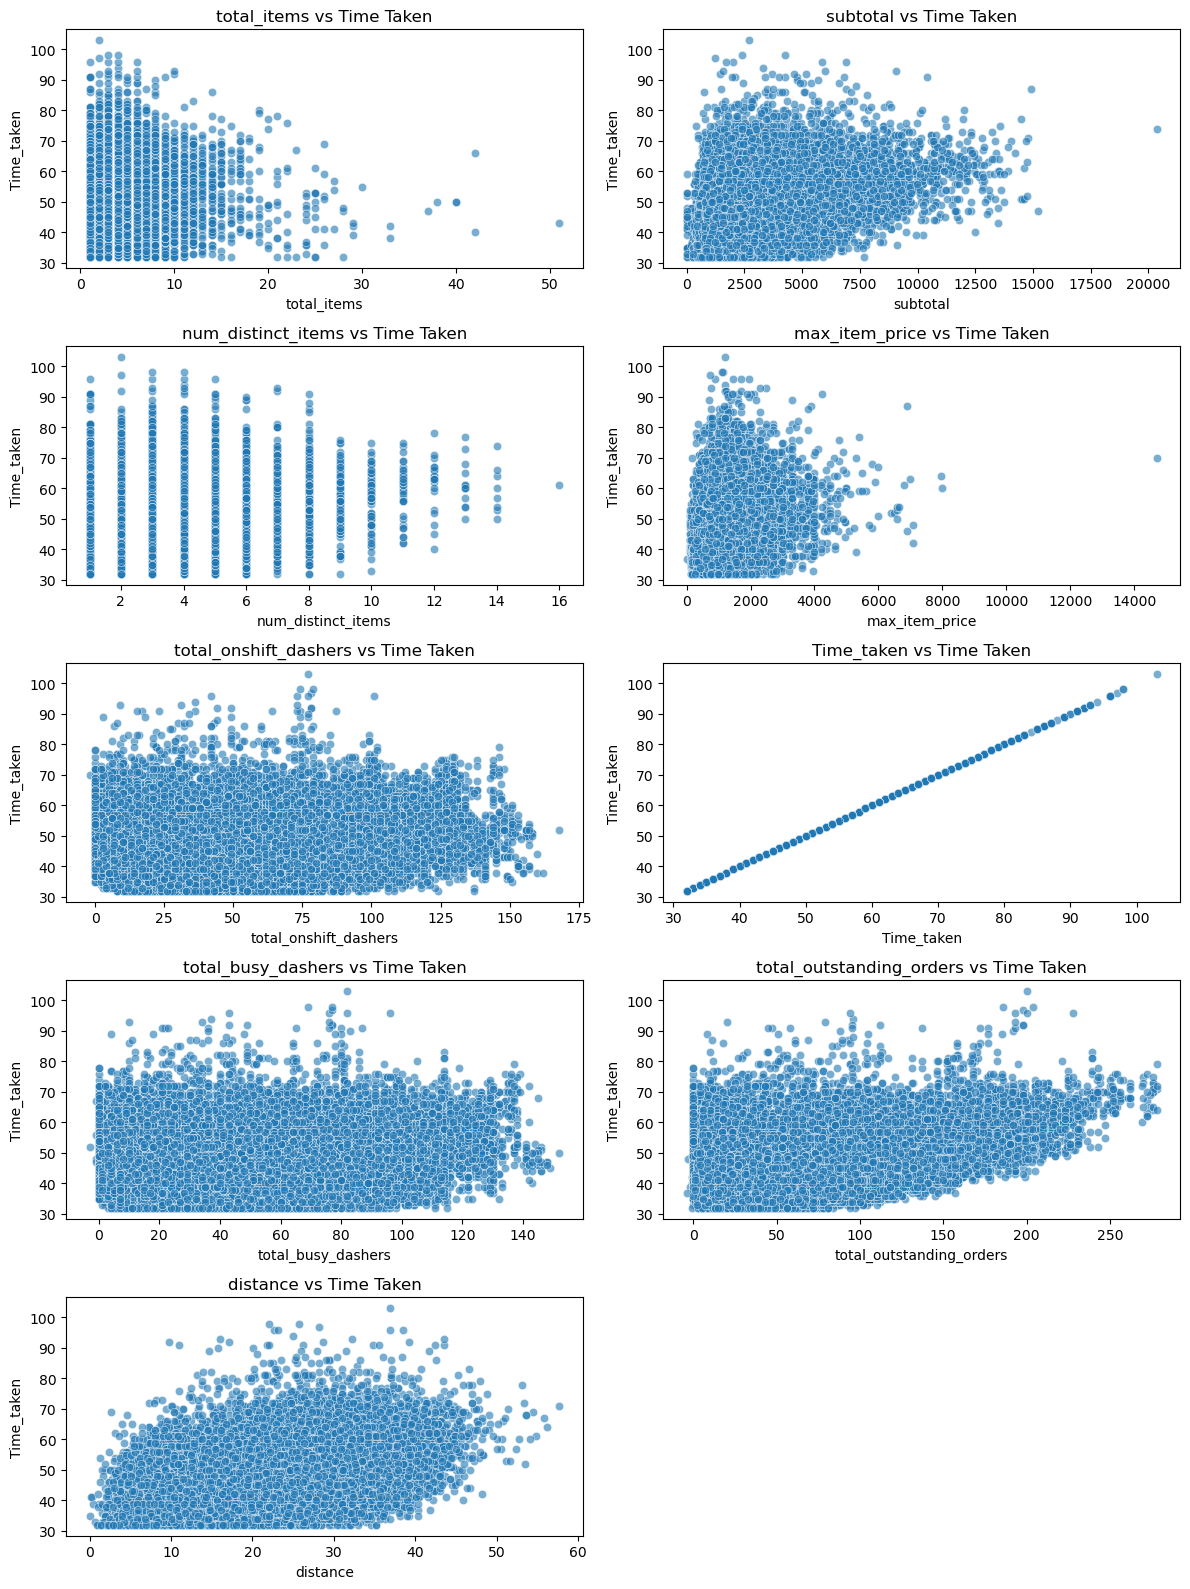

In [104]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(12,16))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_test,x =col,y='Time_taken',alpha=0.6)
    plt.title(f"{ col } vs Time Taken")
    plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [110]:
# Drop the weakly correlated columns from training dataset

weak_Corr_Col = ['store_primary_category','min_item_price','order_hours','order_day_of_week']
df_test.drop(weak_Corr_Col,axis=1,inplace=True)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [112]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [114]:
# Apply scaling to the numerical columns

def add_Dummies(df, columns):
    df = df.copy()  # prevents modifying original df(optional)
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int, drop_first=True)
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
    return df


In [118]:
df_train =add_Dummies(df_train,categoryCols)
df_test =add_Dummies(df_test,categoryCols)

In [120]:
df_test

total_items  subtotal  num_distinct_items  max_item_price  \
50609            4      2596                   4            1099   
49181            3      3180                   2            1300   
4526             1      1199                   1            1199   
131              5      1590                   4             440   
57096            6      3680                   3             750   
...            ...       ...                 ...             ...   
66574            5      1800                   4             825   
33251            4      3336                   3            1589   
76943            3      1900                   3            1300   
43932            2      2138                   2            1537   
49931           11      1573                   5             329   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
50609                   55.0                52.0                      66.0   
49181                  101.0                98.0                     192.0   
4526                     7.0                 6.0                       6.0   
131                      3.0                 4.0                       4.0   
57096                    9.0                 1.0                       1.0   
...                      ...                 ...                       ...   
66574                   95.0                92.0                     142.0   
33251                   34.0                29.0                      33.0   
76943                   36.0                34.0                      26.0   
43932                   70.0                63.0                      85.0   
49931                   21.0                22.0                      31.0   

       distance  Time_taken  market_id_2.0  ...  market_id_4.0  market_id_5.0  \
50609     28.32        50.0              0  ...              0              0   
49181     23.56        69.0              0  ...              1              0   
4526      14.60        41.0              0  ...              0              1   
131       25.64        45.0              0  ...              0              1   
57096     16.08        40.0              0  ...              0              0   
...         ...         ...            ...  ...            ...            ...   
66574     30.92        57.0              0  ...              1              0   
33251     11.04        35.0              0  ...              0              0   
76943      8.12        32.0              0  ...              0              0   
43932     11.76        36.0              1  ...              0              0   
49931     11.88        43.0              0  ...              0              0   

       market_id_6.0  order_protocol_2.0  order_protocol_3.0  \
50609              0                   0                   0   
49181              0                   0                   1   
4526               0                   0                   0   
131                0                   0                   0   
57096              0                   0                   0   
...              ...                 ...                 ...   
66574              0                   0                   1   
33251              0                   0                   1   
76943              0                   0                   0   
43932              0                   0                   1   
49931              0                   0                   0   

       order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
50609                   0                   0                   0   
49181                   0                   0                   0   
4526                    0                   0                   0   
131                     1                   0                   0   
57096                   0                   1                   0   
...                   ...                 ...                 ...   
66574                   0   

In [122]:
y_train_unscaled=df_train['Time_taken']
X_train_unscaled=df_train.drop(columns=['Time_taken'])

In [126]:
y_test_unscaled = df_test['Time_taken']
X_test_unscaled = df_test.drop(columns=['Time_taken'])

X_unscaled_const = sm.add_constant(X_train_unscaled)
model_unscaled = sm.OLS(y_train_unscaled, X_unscaled_const).fit()

coeffs_unscaled = model_unscaled.params
print("Unscaled Coefficients:\n", coeffs_unscaled)

Unscaled Coefficients:
 const                       33.716915
total_items                 -0.060915
subtotal                     0.001376
num_distinct_items           0.595221
max_item_price               0.000943
total_onshift_dashers       -0.281824
total_busy_dashers          -0.215061
total_outstanding_orders     0.373034
distance                     0.478229
market_id_2.0               -5.371948
market_id_3.0               -3.730513
market_id_4.0               -4.527865
market_id_5.0               -3.241221
market_id_6.0               -2.796947
order_protocol_2.0          -0.874109
order_protocol_3.0          -1.552776
order_protocol_4.0          -1.803058
order_protocol_5.0          -2.900103
order_protocol_6.0          -0.966311
order_protocol_7.0          -1.520095
isWeekend_1                  1.162354
dtype: float64


In [128]:
scaler = MinMaxScaler()
num_vars =numCols
num_vars.append('Time_taken')

num_vars

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_onshift_dashers',
 'Time_taken',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'Time_taken']

In [130]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_train = df_train['Time_taken']
X_train = df_train.drop(columns=['Time_taken'])

y_test = df_test['Time_taken']
X_test = df_test.drop(columns=['Time_taken'])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [132]:
# Create/Initialise the model
X_train_scaled_const  = sm.add_constant(X_train)
X_test_scaled_const = sm.add_constant(X_test)

In [134]:
# Train the model using the training data
model_scaled   = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled = model_scaled.params

In [136]:
# Make predictions
y_train_pred = model_scaled.predict(X_train_scaled_const)
y_test_pred = model_scaled.predict(X_test_scaled_const)

In [138]:
# Find results for evaluation metrics
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training R2 Score: 0.8706618770968287
Test R2 Score: 0.8592168884545985
Test RMSE: 0.09750895573553055


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [140]:
# Loop through the number of features and test the model

model = LinearRegression()
# Feature Selection using RFE
rfe = RFE(model, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0'],
      dtype='object')


In [142]:
# Build the final model with selected number of features

X_train_selected = X_train[selected_features]  # Use 'features' selected by RFE or initially all
X_test_selected = X_test[selected_features] 

X_train_scaled_const = sm.add_constant(X_train_selected)
X_test_scaled_const = sm.add_constant(X_test_selected)

model = sm.OLS(y_train, X_train_scaled_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 4.408e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:04:52   Log-Likelihood:                 95813.
No. Observations:               93390   AIC:                        -1.916e+05
Df Residuals:                   93377   BIC:                        -1.915e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [144]:
def print_VIF(df):
    vif =pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

In [146]:
print_VIF(X_train_selected)

Features    VIF
4         total_busy_dashers  75.35
3      total_onshift_dashers  47.23
5   total_outstanding_orders  33.07
0                   subtotal  12.72
2             max_item_price  10.46
6                   distance   5.20
1         num_distinct_items   4.73
7              market_id_2.0   2.76
9              market_id_4.0   2.65
8              market_id_3.0   1.49
10             market_id_5.0   1.45
11             market_id_6.0   1.02

In [148]:
X = X_train_selected.drop('total_busy_dashers',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('total_busy_dashers',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model2 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model2.summary())
print_VIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 4.086e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:08:39   Log-Likelihood:                 89432.
No. Observations:               93390   AIC:                        -1.788e+05
Df Residuals:                   93378   BIC:                        -1.787e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
3      total_onshift_dashers  24.93
4   total_outstanding_orders  19.81
0                   subtotal  12.72
2             max_item_price  10.41
5                   distance   5.15
1         num_distinct_items   4.73
6              market_id_2.0   2.75
8              market_id_4.0   2.65
7              market_id_3.0   1.49
9              market_id_5.0   1.44
10             market_id_6.0   1.02

In [150]:
X = X.drop('total_onshift_dashers',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('total_onshift_dashers',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)
model3 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model3.summary())
print_VIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:10:04   Log-Likelihood:                 45222.
No. Observations:               93390   AIC:                        -9.042e+04
Df Residuals:                   93379   BIC:                        -9.032e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                  subtotal  12.72
2            max_item_price  10.33
4                  distance   5.11
1        num_distinct_items   4.73
3  total_outstanding_orders   3.28
7             market_id_4.0   2.58
5             market_id_2.0   2.55
6             market_id_3.0   1.48
8             market_id_5.0   1.43
9             market_id_6.0   1.02

In [152]:
X = X.drop('subtotal',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('subtotal',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model4 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model4.summary())
print_VIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 1.238e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:10:50   Log-Likelihood:                 43920.
No. Observations:               93390   AIC:                        -8.782e+04
Df Residuals:                   93380   BIC:                        -8.773e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
1            max_item_price  5.28
3                  distance  5.10
2  total_outstanding_orders  3.27
6             market_id_4.0  2.57
4             market_id_2.0  2.54
0        num_distinct_items  2.21
5             market_id_3.0  1.48
7             market_id_5.0  1.42
8             market_id_6.0  1.02

In [154]:
X = X.drop('max_item_price',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('max_item_price',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model5 = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled =model5.params
print(model5.summary())
print_VIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.291e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:11:24   Log-Likelihood:                 42016.
No. Observations:               93390   AIC:                        -8.401e+04
Df Residuals:                   93381   BIC:                        -8.393e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
2                  distance  3.96
1  total_outstanding_orders  3.13
5             market_id_4.0  2.49
3             market_id_2.0  2.48
0        num_distinct_items  2.10
4             market_id_3.0  1.41
6             market_id_5.0  1.37
7             market_id_6.0  1.01

In [156]:
y_train_pred = model5.predict(X_train_scaled_const)
y_test_pred = model5.predict(X_test_scaled_const)

print("\n--- Final Model Performance ---")
print("Train RMSE:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R²:", r2_score(y_test, y_test_pred))


--- Final Model Performance ---
Train RMSE: 0.15430221743104344
Train R²: 0.5251056759078552
Test RMSE: 0.17880674477875258
Test R²: 0.5265988131462424


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

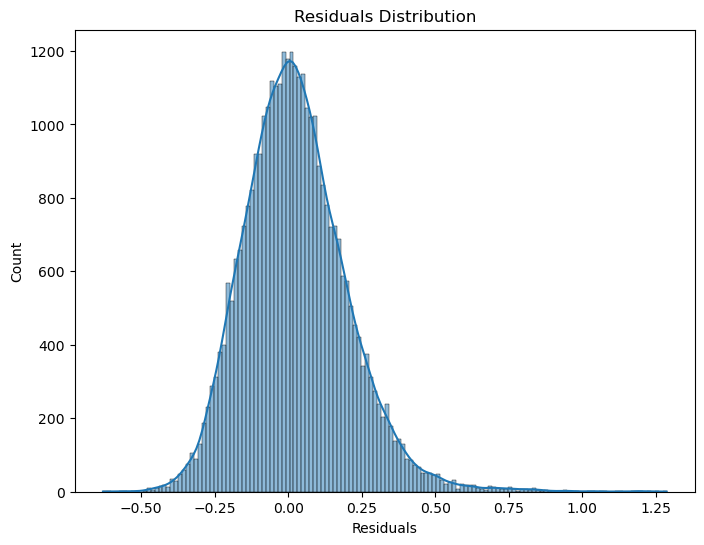

In [158]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

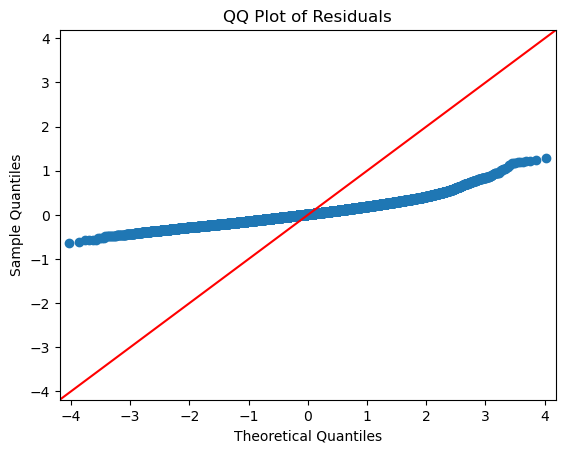

In [164]:
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

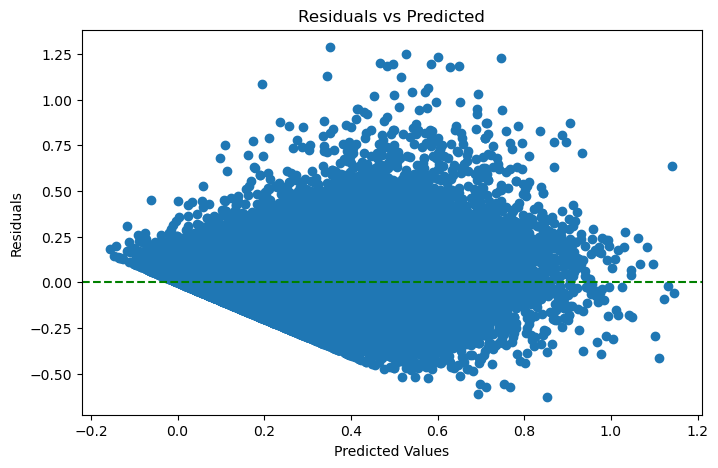

In [166]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='green', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

[Your inferences here:]



In [ ]:
# We can see from the Residuals distribution graph that the error is noramally distributed at the center

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [168]:
# Compare the scaled vs unscaled features used in the final model

comparison_df = pd.DataFrame({
    "Unscaled": coeffs_unscaled,
    "Scaled": coeffs_scaled
})

print("\nCoefficient Comparison:\n", comparison_df[~comparison_df['Scaled'].isna()].sort_values(by='Scaled', ascending=False))



Coefficient Comparison:
                            Unscaled    Scaled
distance                   0.478229  0.617457
total_outstanding_orders   0.373034  0.431836
num_distinct_items         0.595221  0.239969
const                     33.716915  0.034083
market_id_5.0             -3.241221 -0.090839
market_id_3.0             -3.730513 -0.105024
market_id_6.0             -2.796947 -0.119168
market_id_4.0             -4.527865 -0.178173
market_id_2.0             -5.371948 -0.252167


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

#From the final model we can observe that 
# At 1 unit increase in distance increase the time taken by 0.6 units
# Similarly a 1 unit increase in total_outstanding_orders increase the time taken by 0.4 units

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes,there are catagorical values in the data set like market_id , store_primary_category, order_protocol.
1. Time_taken may vary significantly across markets. Grouping by 'market_id' and plotting average delivery time can reveal operational differences by region. Market-level logistical variation (market_id)
2. 'store_primary_category' likely affects Time_taken due to order prep complexity. Store type-specific prep/delivery behavior (store_primary_category)
3. 'order_protocol' might explain systemic differences in delivery time depending on how the order was placed and processed. Operational differences in order handling (order_protocol)



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

Yes I have one category column, 'market_id' in my final model and it has negative coeeficient with the target variable, which means if you place order from 'market_id 5' it will take less time.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

It defined the test sample size of 20% and the train set sample of remaining 80%.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

I have followed these 2 approach.

1. Finding invalid data , by understanding column specification.
2. Removing outlier Using IQR formula(through graph showing the outliers).



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



Based on the final model (model5) result we can see total_outstanding_orders, distance ,num_distinct_items significantly increase the delivery time.

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



Linear Regression predicts a continuous outcome based on one or more input variables by fitting a straight line. It assumes a linear relationship and minimizes the error between actual and predicted values. 
It includes simple (one variable) and multiple (many variables) regression for prediction and trend analysis.
There are two type of Linear Regression 
1. Simple Linear Regression. 
2. Multi linear Regression.

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



Simple Linear Regression uses one independent variable to predict a dependent variable, fitting a straight line 
Equation :- (Y = a + bX).
Multiple Linear Regression uses two or more independent variables to predict the dependent variable 
Equation :- (Y = a + b₁X₁ + b₂X₂ + ... + bₙXₙ)
capturing more complex relationships.

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



The cost function in linear regression measures how well the model's predictions match the actual data. It quantifies the error between predicted outputs(y cap) and actual outputs (y).
By evaluating this error, the cost function guides the training process of the model. The goal during training is to minimize this cost, ensuring the model learns the most accurate coefficients. A lower cost means better predictions and a more accurate model. Typically, Mean Squared Error (MSE) is used as the cost function, and optimization techniques like gradient descent are applied to find the best-fitting line.

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



Overfitting occurs when a model learns the training data too well, including noise and outliers, resulting in poor performance on unseen data. It has high accuracy on training data but low accuracy on test data.

Underfitting happens when a model is too simple to capture the underlying pattern in the data, resulting in poor performance on both training and test data.

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residual plots help assess the validity of a linear regression model by showing the difference between actual and predicted values (residuals) on the y-axis and the predicted values on the x-axis.